In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [241]:
df = pd.read_csv('/content/sample_submission.csv')

Process

To predict whether a Twitter post is related to a disaster, you'll need to train a text classification model. Below are the steps to achieve this:

### 1. *Data Preprocessing*
   - *Handle Null Values*:
     - Impute or remove null values in location and keywords. You can replace them with a placeholder (e.g., "unknown") or discard them if not useful.
   - *Text Cleaning*:
     - Remove or handle special characters, URLs, emojis, and other non-alphanumeric content. This can be done using regular expressions (e.g., in Python).
     - Convert text to lowercase and remove stopwords (common words like "the," "and").
   - *Tokenization*:
     - Break the text into individual words (tokens) using tokenizers like those from the Natural Language Toolkit (NLTK) or spaCy.
   - *Stemming/Lemmatization* (optional):
     - Reduce words to their base forms (e.g., "running" → "run").

### 2. *Feature Engineering*
   - *Text Vectorization*:
     - Convert the text data into numerical form. Common approaches include:
       - *Bag of Words (BoW)*: Creates a sparse matrix of word counts.
       - *TF-IDF (Term Frequency-Inverse Document Frequency)*: Gives importance to words that are frequent in a document but less common across all documents.
       - *Word Embeddings*: Use pre-trained embeddings like Word2Vec, GloVe, or Transformer-based models (e.g., BERT) to capture semantic meaning of words.
   - *Keyword & Location*:
     - Use these fields if available. You can encode them using methods like One-Hot Encoding (for location) or by treating keywords as additional features.

### 3. *Model Selection*
   You can choose different algorithms based on the complexity of your dataset:
   - *Baseline Models*:
     - *Logistic Regression*: A good starting point for binary classification.
     - *Naive Bayes*: Effective for text data.
   - *Advanced Models*:
     - *Random Forest or Gradient Boosting (XGBoost, LightGBM)*: If you want tree-based methods.
     - *Deep Learning*:
       - *Recurrent Neural Networks (RNNs)*, such as LSTM or GRU, which are designed to handle sequential data like text.
       - *Transformer-based models*, such as BERT or RoBERTa, which are state-of-the-art for text classification tasks.

### 4. *Train-Test Split*
   - Split the dataset into training and testing sets (e.g., 80% training, 20% testing). You can also create a validation set to fine-tune hyperparameters.

### 5. *Model Training*
   - Train the model using the processed dataset. For deep learning models, you may need GPUs to speed up training.

### 6. *Evaluation*
   - Evaluate the model on the test set using metrics like:
     - *Accuracy*: Overall correctness.
     - *Precision, Recall, F1-Score*: Especially useful if the dataset is imbalanced.
     - *ROC-AUC*: For evaluating classification performance.

### 7. *Hyperparameter Tuning*
   - Use techniques like Grid Search or Random Search to optimize the model's performance by tuning hyperparameters (e.g., learning rate, regularization).

### 8. *Model Deployment*
   - Once you have a good-performing model, you can deploy it for real-time prediction or batch processing of Twitter posts.

#### Tools & Libraries to Use:
   - *Text Preprocessing*: NLTK, spaCy, regex.
   - *Feature Engineering*: Scikit-learn (for BoW, TF-IDF), Hugging Face Transformers (for BERT).
   - *Modeling*: Scikit-learn, XGBoost, TensorFlow, PyTorch, Hugging Face Transformers.
   - *Evaluation*: Scikit-learn for metrics like accuracy, precision, recall, and F1-score.

Would you like more details on a specific model or preprocessing step?

In [242]:
df

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [243]:
test_data = pd.read_csv('/content/test.csv')

In [244]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [245]:
train_data =pd.read_csv('/content/train.csv')

In [246]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [247]:
train_data.shape

(7613, 5)

In [248]:
train_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [249]:
import re
def remove_percent20(text):
    return re.sub(r'%20', ' ', text)

In [250]:
keyWords=[]
for i in train_data['keyword'].unique():
  if i!=float('nan') and i!='nan' and isinstance(i,str):
    keyWords.append(remove_percent20(i))

In [251]:
keyWords

['ablaze',
 'accident',
 'aftershock',
 'airplane accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown up',
 'body bag',
 'body bagging',
 'body bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge collapse',
 'buildings burning',
 'buildings on fire',
 'burned',
 'burning',
 'burning buildings',
 'bush fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical emergency',
 'cliff fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'desolation',
 'destroy',
 'des

In [252]:
location =[]
for i in train_data['location'].unique():
  if i!=float('nan') and i!='nan' and isinstance(i,str):
    location.append(remove_percent20(i))


In [253]:
location

['Birmingham',
 'Est. September 2012 - Bristol',
 'AFRICA',
 'Philadelphia, PA',
 'London, UK',
 'Pretoria',
 'World Wide!!',
 'Paranaque City',
 'Live On Webcam',
 'milky way',
 'GREENSBORO,NORTH CAROLINA',
 'England.',
 'Sheffield Township, Ohio',
 'India',
 'Barbados',
 'Anaheim',
 'Abuja',
 'USA',
 'South Africa',
 'Sao Paulo, Brazil',
 'hollywoodland ',
 'Edmonton, Alberta - Treaty 6',
 'Inang Pamantasan',
 'Twitter Lockout in progress',
 'Concord, CA',
 'Calgary, AB',
 'San Francisco',
 'CLVLND',
 'Nashville, TN',
 'Santa Clara, CA',
 'UK',
 'St. Louis, MO',
 'Walker County, Alabama',
 'Australia',
 'North Carolina',
 'Norf Carolina',
 'San Mateo County, CA',
 'Njoro, Kenya',
 "Your Sister's Bedroom",
 'Arlington, TX',
 'South Bloomfield, OH',
 'New Hanover County, NC',
 'Maldives',
 'Manchester, NH',
 'Wilmington, NC',
 'global',
 'Alberta | Sask. | Montana',
 'Charlotte',
 'Baton Rouge, LA',
 'Hagerstown, MD',
 'Gloucestershire , UK',
 'Nairobi, Kenya',
 'Instagram - @heyimgino

In [254]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Tokenization


In [255]:
!pip install nltk

In [256]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

In [257]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [258]:
for i in train_data['text']:
  word =[]
  data = sent_tokenize(i)
  for i in data:
    words = word_tokenize(i)
    for j in words:
        word.append(j)
  print(word)


Streaming output truncated to the last 5000 lines.
['How', 'can', 'we', 'help', 'save', 'a', 'beautiful', 'town', 'in', 'Ontario', 'from', 'destruction', 'by', 'a', 'power', 'plant', 'developer', '?', 'http', ':', '//t.co/hlD5xLYwBn']
['Crackdown', '3', 'Destruction', 'Restricted', 'to', 'Multiplayer', ':', 'Crackdown', '3', 'impressed', 'earlier', 'this', 'week', 'with', 'a', 'demonstratio', '...', 'http', ':', '//t.co/LMWKjsYCgj']
['@', 'DanHRothschild', 'Greed', 'is', 'the', 'fuel', 'of', 'self-destruction', '.', '#', 'Takecare']
['@', 'cinla1964', '@', 'windowgatribble', 'The', 'Contrasts', 'of', 'Foreboding', 'destruction', 'enhanced', 'by', 'Expansive', 'divisions', 'of', 'color', 'saturation', 'contrast', 'and', 'hue', '!']
['Russian', 'authorities', 'to', 'take', 'account', 'of', 'petition', 'against', 'destruction', 'of', 'sanctioned', 'food', ':', 'Vladimir', 'Putin', "'s", 'press', '...', 'http', ':', '//t.co/QbMcSJaVt0']
['Fall', 'back', 'this', 'first', 'break', 'homebuyer

Stemmer And StopWords

In [259]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [260]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [261]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [262]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [263]:
from nltk.stem import SnowballStemmer
snowballstemmer=SnowballStemmer('english')

In [264]:
import re
url_pattern = r'http[s]?://\S+'
symbol_pattern = r'[!?-.|#=$,;:@\'\"_\[\]\(\)]+'
cleaning_pattern = r'[^a-zA-Z\s]+'




In [265]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
def tokenization(data):
  wordsAfterTokenizing=[]
  for i in data['text']:
    # removed urls
    removed_links = cleaned_text = re.sub(url_pattern, '', i)
    cleaned_text = re.sub(cleaning_pattern, '', removed_links)
    k = tokenizer.tokenize(cleaned_text)
    wordings  = [ snowballstemmer.stem(words) for words in k if  words not in set(stopwords.words('english'))]
    wordsAfterTokenizing.append(wordings)
  return wordsAfterTokenizing

In [266]:
test_data_after_tokenizing =tokenization(test_data);
train_data_after_tokenizing =tokenization(train_data);

In [267]:
test_data_after_tokenizing

[['just', 'happen', 'terribl', 'car', 'crash'],
 ['heard', 'earthquak', 'differ', 'citi', 'stay', 'safe', 'everyon'],
 ['forest',
  'fire',
  'spot',
  'pond',
  'gees',
  'flee',
  'across',
  'street',
  'i',
  'save'],
 ['apocalyps', 'light', 'spokan', 'wildfir'],
 ['typhoon', 'soudelor', 'kill', 'china', 'taiwan'],
 ['were', 'shakingit', 'earthquak'],
 ['theyd',
  'probabl',
  'still',
  'show',
  'life',
  'arsenal',
  'yesterday',
  'eh',
  'eh'],
 ['hey', 'how'],
 ['what', 'nice', 'hat'],
 ['fuck'],
 ['no', 'i', 'dont', 'like', 'cold'],
 ['nooooooooo', 'dont'],
 ['no', 'dont', 'tell'],
 ['what'],
 ['awesom'],
 ['birmingham',
  'wholesal',
  'market',
  'ablaz',
  'bbc',
  'news',
  'fire',
  'break',
  'birmingham',
  'wholesal',
  'market'],
 ['sunkxssedharri', 'wear', 'short', 'race', 'ablaz'],
 ['previouslyondoyintv',
  'toke',
  'makinwa',
  'marriag',
  'crisi',
  'set',
  'nigerian',
  'twitter',
  'ablaz'],
 ['check', 'nsfw'],
 ['psa',
  'im',
  'split',
  'person',
  'te

Lemmatizer

In [268]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [269]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [270]:
def lemmatization(data):
  final_words=[]
  for i in data:
    afterLemmatizer=[lemmatizer.lemmatize(word.lower(),pos='v') for word in i if word not in set(stopwords.words('english'))]
    final_words.append(afterLemmatizer)
  return final_words

In [271]:
test_lemmatizer = lemmatization(test_data_after_tokenizing)
train_lemmatizer= lemmatization(train_data_after_tokenizing)

In [272]:
train_lemmatizer

[['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us'],
 ['forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada'],
 ['resid',
  'ask',
  'shelter',
  'place',
  'notifi',
  'offic',
  'evacu',
  'shelter',
  'place',
  'order',
  'expect'],
 ['peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california'],
 ['get',
  'send',
  'photo',
  'rubi',
  'alaska',
  'smoke',
  'wildfir',
  'pour',
  'school'],
 ['rockyfir',
  'updat',
  'california',
  'hwi',
  'close',
  'direct',
  'due',
  'lake',
  'counti',
  'fire',
  'cafir',
  'wildfir'],
 ['flood',
  'disast',
  'heavi',
  'rain',
  'caus',
  'flash',
  'flood',
  'street',
  'manitou',
  'colorado',
  'spring',
  'area'],
 ['im', 'top', 'hill', 'see', 'fire', 'wood'],
 ['emerg', 'evacu', 'happen', 'build', 'across', 'street'],
 ['im', 'afraid', 'tornado', 'come', 'area'],
 ['three', 'peopl', 'die', 'heat', 'wave', 'far'],
 ['haha',
  'south',
  'tampa',
  'get',
  'flood',
  'hah',
  'wait',
  'second',
  'live',
  'south'

In [273]:
train_data['text'].count() == len(train_lemmatizer)

True

In [274]:
len(test_lemmatizer)

3263

In [275]:
test_data['text'].count()

3263

In [276]:
def flatSentence(data):
  data_flat = [' '.join(sentence) for sentence in data]
  return data_flat

In [277]:
test_data_flat = flatSentence(test_lemmatizer)
train_data_flat = flatSentence(train_lemmatizer)

In [278]:
test_data_flat

['happen terribl car crash',
 'hear earthquak differ citi stay safe everyon',
 'forest fire spot pond gee flee across street save',
 'apocalyps light spokan wildfir',
 'typhoon soudelor kill china taiwan',
 'shakingit earthquak',
 'theyd probabl still show life arsenal yesterday eh eh',
 'hey',
 'nice hat',
 'fuck',
 'dont like cold',
 'nooooooooo dont',
 'dont tell',
 '',
 'awesom',
 'birmingham wholesal market ablaz bbc news fire break birmingham wholesal market',
 'sunkxssedharri wear short race ablaz',
 'previouslyondoyintv toke makinwa marriag crisi set nigerian twitter ablaz',
 'check nsfw',
 'psa im split person techi follow ablazeco burner follow ablaz',
 'bewar world ablaz sierra leon amp guap',
 'burn man ablaz turban diva via etsi',
 'diss song peopl take thing run smh eye open though set game ablaz cyhitheprync',
 'rape victim die set ablaz yearold girl die burn injuri set ablaz',
 'set ablaz',
 'ctvtoronto bin front field hous wer set ablaz day flame go rite hydro pole won

*Vectorization*


Create TF-IDF And NGrams

In [279]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [280]:
import pickle

In [281]:
tfidf=TfidfVectorizer(max_features=100)
X_train=tfidf.fit_transform(train_data_flat).toarray()

X_test=tfidf.transform(test_data_flat).toarray()

In [282]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

N-Grams

In [283]:
tfidf=TfidfVectorizer(max_features=100,ngram_range=(2,2))
# saving vectors
X=tfidf.fit_transform(train_data_flat).toarray()
with open('vectorizer_text.pkl', 'wb') as file:
      pickle.dump(tfidf, file)

In [284]:
tfidf.vocabulary_

{'forest fire': 34,
 'heat wave': 38,
 'gon na': 37,
 'dont know': 23,
 'debri find': 19,
 'reunion island': 75,
 'via youtub': 91,
 'look like': 48,
 'helicopt crash': 39,
 'emerg servic': 26,
 'feel like': 32,
 'like youtub': 46,
 'youtub video': 98,
 'full read': 35,
 'northern california': 57,
 'suicid bomb': 82,
 'atom bomb': 3,
 'fedex longer': 31,
 'longer transport': 47,
 'wan na': 92,
 'california wildfir': 11,
 'cross bodi': 18,
 'bodi bag': 5,
 'bomb turkey': 6,
 'rescuer search': 74,
 'burn build': 10,
 'train derail': 86,
 'break news': 9,
 'emerg plan': 25,
 'fall cliff': 27,
 'typhoon soudelor': 89,
 'confirm mh': 15,
 'mh malaysia': 54,
 'deton bomb': 21,
 'knock deton': 43,
 'obama declar': 59,
 'declar disast': 20,
 'disast typhoondevast': 22,
 'typhoondevast saipan': 90,
 'obama sign': 60,
 'natur disast': 56,
 'hundr migrant': 42,
 'dust storm': 24,
 'sever thunderstorm': 77,
 'thunderstorm warn': 85,
 'boy charg': 8,
 'charg manslaught': 12,
 'first respond': 33,
 

Using Logistic Regression

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
labels =[0,1]
X_train, X_test, y_train, y_test = train_test_split(X, train_data['target'], test_size=0.2, random_state=42)

In [286]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [287]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# 0.6565988181221274

Accuracy: 0.6565988181221274


Confusion Matrix

In [288]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

[[852  22]
 [501 148]]


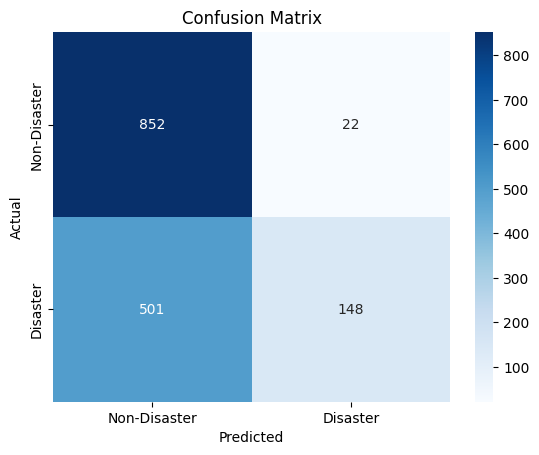


Accuracy: 0.6565988181221274

Classification Report:
              precision    recall  f1-score   support

Non-Disaster       0.63      0.97      0.77       874
    Disaster       0.87      0.23      0.36       649

    accuracy                           0.66      1523
   macro avg       0.75      0.60      0.56      1523
weighted avg       0.73      0.66      0.59      1523



In [289]:
print(cm)

# 3. Visualize the Confusion Matrix using Seaborn heatmap (Optional)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 4. (Optional) Print accuracy, precision, recall, F1-score
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Disaster', 'Disaster']))

Based on the output you provided:

### Accuracy:
- **Accuracy**: 0.6566 (or 65.66%) indicates that the model correctly predicted about 66% of the instances in the test set.

### Classification Report:
- **Precision**:
  - For **Non-Disaster**: Precision is 0.63, meaning when the model predicts non-disaster, it is correct 63% of the time.
  - For **Disaster**: Precision is 0.87, meaning when the model predicts disaster, it is correct 87% of the time.
  
- **Recall**:
  - For **Non-Disaster**: Recall is 0.97, meaning the model correctly identifies 97% of the actual non-disaster instances.
  - For **Disaster**: Recall is 0.23, meaning the model only identifies 23% of the actual disaster instances.

- **F1-score**:
  - **F1-score** is a harmonic mean of precision and recall:
    - **Non-Disaster**: F1-score is 0.77, which balances precision and recall for non-disaster class.
    - **Disaster**: F1-score is 0.36, indicating a lower balance between precision and recall for disaster class.

### Interpretation:
- **Good Aspects**:
  - The model has a relatively high precision for predicting non-disaster instances (0.63) and disaster instances (0.87), meaning it makes fewer false positive predictions.
  - The overall accuracy of 65.66% is reasonable, indicating the model performs better than random guessing.

- **Areas for Improvement**:
  - The recall for disaster instances is quite low (0.23), indicating that the model misses a significant number of actual disaster cases.
  - The F1-score for disaster class (0.36) suggests that the model's ability to correctly predict disasters needs improvement, possibly by adjusting class weights or using more sophisticated models.

### Conclusion:
- The model shows promising aspects with decent accuracy and precision for both classes. However, it needs improvement in recall and F1-score, especially for the disaster class. Depending on the application and the consequences of missing disasters, you might need to tune the model further or explore more complex techniques.



**Naive Baye**

In [290]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76      1407
           1       0.18      0.98      0.30       116

    accuracy                           0.65      1523
   macro avg       0.59      0.80      0.53      1523
weighted avg       0.94      0.65      0.73      1523



In [291]:
print(accuracy_score(y_pred,y_test))

0.6474064346684176


**Random Forest  Decision Tree Gradient Boosting**

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [293]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.6591
- F1 score: 0.5967
- Precision: 0.8968
- Recall: 0.2353
- Roc Auc Score: 0.6074
----------------------------------
Model performance for Test set
- Accuracy: 0.6566
- F1 score: 0.5931
- Precision: 0.8706
- Recall: 0.2280
- Roc Auc Score: 0.6014


Decision Tree
Model performance for Training set
- Accuracy: 0.6606
- F1 score: 0.5985
- Precision: 0.9028
- Recall: 0.2372
- Roc Auc Score: 0.6090
----------------------------------
Model performance for Test set
- Accuracy: 0.6553
- F1 score: 0.5921
- Precision: 0.8605
- Recall: 0.2280
- Roc Auc Score: 0.6003


Random Forest
Model performance for Training set
- Accuracy: 0.6606
- F1 score: 0.5989
- Precision: 0.8993
- Recall: 0.2384
- Roc Auc Score: 0.6091
----------------------------------
Model performance for Test set
- Accuracy: 0.6559
- F1 score: 0.5931
- Precision: 0.8613
- Recall: 0.2296
- Roc Auc Score: 0.6011


Gradient Boost
Model performance for Training se

Considering Other features like Keywords , Location

In [294]:
vectorizer_kw = TfidfVectorizer()
X_kw = vectorizer_kw.fit_transform(train_data['keyword'].fillna(""))

vectorizer_loc = TfidfVectorizer()
X_loc = vectorizer_loc.fit_transform(train_data['location'].fillna(""))
# savings
with open('vectorizer_kw.pkl', 'wb') as f:
    pickle.dump(vectorizer_kw, f)

with open('vectorizer_loc.pkl', 'wb') as f:
    pickle.dump(vectorizer_loc, f)


In [295]:
from scipy.sparse import hstack

# Combine all features into a single matrix
# X that contains the preprossed text
X_combined = hstack([X, X_kw, X_loc])

# or
# import numpy as np

# X_combined = np.hstack([X_desc.toarray(), X_kw.toarray(), X_loc.toarray()])

In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
labels =[0,1]
X_train, X_test, y_train, y_test = train_test_split(X_combined, train_data['target'], test_size=0.2, random_state=42)

In [297]:
X_combined.toarray()
X_combined.shape

(7613, 3600)

In [298]:
# for saving model
import pickle

In [299]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    model_name = list(models.keys())[i]
    # Save the model to a file
    with open(f'{model_name}.pkl', 'wb') as file:
      pickle.dump(model, file)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])




    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')


Logisitic Regression
Model performance for Training set
- Accuracy: 0.8041
- F1 score: 0.8020
- Precision: 0.8119
- Recall: 0.7094
- Roc Auc Score: 0.7926
----------------------------------
Model performance for Test set
- Accuracy: 0.7249
- F1 score: 0.7237
- Precision: 0.6879
- Recall: 0.6487
- Roc Auc Score: 0.7151


Decision Tree
Model performance for Training set
- Accuracy: 0.9228
- F1 score: 0.9225
- Precision: 0.9356
- Recall: 0.8814
- Roc Auc Score: 0.9178
----------------------------------
Model performance for Test set
- Accuracy: 0.6842
- F1 score: 0.6836
- Precision: 0.6329
- Recall: 0.6163
- Roc Auc Score: 0.6754


Random Forest
Model performance for Training set
- Accuracy: 0.9227
- F1 score: 0.9225
- Precision: 0.9223
- Recall: 0.8959
- Roc Auc Score: 0.9194
----------------------------------
Model performance for Test set
- Accuracy: 0.7026
- F1 score: 0.7019
- Precision: 0.6561
- Recall: 0.6348
- Roc Auc Score: 0.6938


Gradient Boost
Model performance for Training se

Maximum reached model Accuracy - 92 using random forest and descision tree

**Using LSTM (Long Short term Memory RNN)**

In [300]:
import tensorflow as tf

In [301]:
tf.__version__

'2.17.0'

In [302]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [303]:
voc_size=500

In [304]:
X_train = train_data.iloc[:,:-1]
X_train

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...


In [305]:
y_train = train_data.iloc[:,-1]
y_train

,target
0,1
1,1
2,1
3,1
4,1
...,...
7608,1
7609,1
7610,1
7611,1


Performing One Hot Encoding

In [306]:
import nltk
import re
from nltk.corpus import stopwords

In [307]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(X_train)):
    review = re.sub('[^a-zA-Z]', ' ', X_train['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [308]:
corpus[:20]

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area',
 'three peopl die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood',
 'rain flood florida tampabay tampa day lost count',
 'flood bago myanmar arriv bago',
 'damag school bu multi car crash break',
 'man',
 'love fruit',
 'summer love',
 'car fast',
 'goooooooaaaaaal']

In [309]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr[:10]

[[23, 62, 118, 222, 234, 326, 159],
 [152, 447, 181, 292, 99, 216, 367],
 [326, 157, 254, 219, 237, 179, 411, 254, 219, 12, 470],
 [270, 118, 441, 411, 12, 88],
 [485, 345, 5, 422, 139, 41, 441, 430, 155],
 [175, 458, 88, 186, 393, 113, 317, 109, 243, 447, 34, 441],
 [426, 30, 252, 411, 337, 118, 426, 495, 266, 274, 368, 366],
 [97, 123, 394, 447, 313],
 [348, 411, 388, 256, 270, 495],
 [124, 274, 389, 366]]

In [310]:
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[ 23  62 118 ...   0   0   0]
 [152 447 181 ...   0   0   0]
 [326 157 254 ...   0   0   0]
 ...
 [236 495 251 ...   0   0   0]
 [403 352 402 ...   0   0   0]
 [177 317  49 ...   0   0   0]]


In [311]:
embedded_docs = embedded_docs.reshape(7613, 50, )

In [312]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

embedding_dim = 1
# Define the model
model_ls = Sequential()

# LSTM layers (no need to reshape if data is already in correct format)
model_ls.add(LSTM(200, return_sequences=True, input_shape=(50, embedding_dim)))
model_ls.add(LSTM(64))

# Fully connected layers
model_ls.add(Dense(40, activation="relu", name="feat_x"))
model_ls.add(Dense(1, activation="sigmoid"))  # For binary classification

# Compile the model
model_ls.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

# Print model summary
model_ls.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 50, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          67,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feat_x (Dense)                       │ (None, 40)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,081 (906.57 KB)

 Trainable params: 232,081 (906.57 KB)

 Non-trainable params: 0 (0.00 B)

In [313]:
len(embedded_docs), y_train.shape

(7613, (7613,))

In [314]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y_train)

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [316]:
X_train

array([[  5,  33, 487, ...,   0,   0,   0],
       [265,   0,   0, ...,   0,   0,   0],
       [ 81, 243, 286, ...,   0,   0,   0],
       ...,
       [ 37, 284, 336, ...,   0,   0,   0],
       [183,  87, 369, ...,   0,   0,   0],
       [464, 460, 473, ...,   0,   0,   0]], dtype=int32)

In [317]:
### Finally Training
model_ls.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=64)

Epoch 1/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 279ms/step - acc: 0.5641 - loss: 0.6705 - val_acc: 0.5957 - val_loss: 0.6496
Epoch 2/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 43s 301ms/step - acc: 0.5982 - loss: 0.6523 - val_acc: 0.5897 - val_loss: 0.6543


In [318]:
from tensorflow.keras.layers import Dropout

model_ls = Sequential()
model_ls.add(LSTM(128, return_sequences=True, input_shape=(50, 1)))
model_ls.add(Dropout(0.2))  # Add dropout to reduce overfitting
model_ls.add(LSTM(64))
model_ls.add(Dropout(0.2))
model_ls.add(Dense(40, activation="relu", name="feat_x"))
model_ls.add(Dense(1, activation="sigmoid"))  # For binary classification
from tensorflow.keras.optimizers import Adam

model_ls.compile(optimizer=Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["acc"])
model_ls.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 50, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feat_x (Dense)                       │ (None, 40)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,609 (463.32 KB)

 Trainable params: 118,609 (463.32 KB)

 Non-trainable params: 0 (0.00 B)

In [319]:
### Finally Training
model_ls.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=64)

Epoch 1/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - acc: 0.5517 - loss: 0.6852 - val_acc: 0.5977 - val_loss: 0.6519
Epoch 2/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - acc: 0.5886 - loss: 0.6515 - val_acc: 0.5981 - val_loss: 0.6527


Pipeling with the model

In [320]:
import pickle
with open('/content/Decision Tree.pkl', 'rb') as file:
    # print(file.read(100))
    model = pickle.load(file)


In [321]:
#  # Making predictions on saved model
# predictions = model.predict(X_train)

# # Output the predictions
# print(predictions)

In [322]:
with open('vectorizer_text.pkl', 'rb') as file:
    vectorizer_text = pickle.load(file)

with open('vectorizer_kw.pkl', 'rb') as file:
    vectorizer_kw = pickle.load(file)

with open('vectorizer_loc.pkl', 'rb') as file:
    vectorizer_loc = pickle.load(file)


In [323]:
# text=input("   Enter the Disaster      ")
# keyword=input(" Enter a KeyWord    ")
# location=input(" Enter a Location    ")
# print(text, keyword, location)

text="The earth in flames, with earthquakes swallowing whole towns and buildings burning. Much damage has been done by earthquakes from time to time. The eruptions of 1868, 1887 and 1907 were attended by earthquakes; in 1868 huge sea waves, 40 ft."
keyword="theft"
location="nan"
text=" She has a sweet smile. That candy is too sweet. She likes her coffee sweet. He's a really sweet guy"

In [324]:
map ={
    "text" :text
}
# Tokenization for text
tokened_text=tokenization(map)
print(tokened_text)
# lemmatization
lemmatized_text=lemmatization(tokened_text)
print(lemmatized_text)
# flattern
flattened_text=flatSentence(lemmatized_text)
print(flattened_text)

X_kw_new = vectorizer_kw.transform([keyword])
X_loc_new = vectorizer_loc.transform([location])
X_text_new = vectorizer_text.transform(flattened_text)


[[], ['s'], ['h'], ['e'], [], ['h'], [], [], [], [], [], [], ['w'], ['e'], ['e'], [], [], [], [], [], ['l'], ['e'], [], [], ['t'], ['h'], [], [], [], ['c'], [], ['n'], [], [], [], [], [], [], [], [], [], [], [], ['w'], ['e'], ['e'], [], [], [], ['s'], ['h'], ['e'], [], ['l'], [], ['k'], ['e'], [], [], ['h'], ['e'], ['r'], [], ['c'], [], ['f'], ['f'], ['e'], ['e'], [], [], ['w'], ['e'], ['e'], [], [], [], ['h'], ['e'], [], [], [], [], [], ['r'], ['e'], [], ['l'], ['l'], [], [], [], ['w'], ['e'], ['e'], [], [], ['g'], ['u'], []]
[[], [], ['h'], ['e'], [], ['h'], [], [], [], [], [], [], ['w'], ['e'], ['e'], [], [], [], [], [], ['l'], ['e'], [], [], [], ['h'], [], [], [], ['c'], [], ['n'], [], [], [], [], [], [], [], [], [], [], [], ['w'], ['e'], ['e'], [], [], [], [], ['h'], ['e'], [], ['l'], [], ['k'], ['e'], [], [], ['h'], ['e'], ['r'], [], ['c'], [], ['f'], ['f'], ['e'], ['e'], [], [], ['w'], ['e'], ['e'], [], [], [], ['h'], ['e'], [], [], [], [], [], ['r'], ['e'], [], ['l'], ['l'], []

In [325]:
from scipy.sparse import hstack, vstack, csr_matrix

X_kw_new = csr_matrix(np.tile(X_kw_new.toarray(), (X_text_new.shape[0], 1)))
X_loc_new = csr_matrix(np.tile(X_loc_new.toarray(), (X_text_new.shape[0], 1)))

# Check the shapes
print("Shape of X_text_new:", X_text_new.shape)
print("Shape of X_kw_new:", X_kw_new.shape)
print("Shape of X_loc_new:", X_loc_new.shape)

Shape of X_text_new: (100, 100)
Shape of X_kw_new: (100, 239)
Shape of X_loc_new: (100, 3261)


In [326]:
from scipy.sparse import hstack

# Combine all features into a single matrix
# X that contains the preprossed text
X_combined = hstack([X_text_new, X_kw_new,X_loc_new])

In [327]:
print("Shape of combined features:", X_combined.shape)


Shape of combined features: (100, 3600)


In [328]:
predictions = model.predict(X_combined)
print(predictions)
if predictions[0] == 0:
  print("Not Disaster")
else:
  print("Disaster")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Disaster
